# Explorando o modelo Faster R-CNN

Neste notebook será tentado treinar o modelo "Faster R-CNN" na base de dados NuScenes para detecção de VRUs.

## Links interessantes

As referências abaixo foram utilizadas como base para escrever este notebook

**Artigo original do modelo**

- [Faster R-CNN: Towards Real-Time Object Detection with Region Proposal Networks](https://arxiv.org/abs/1506.01497)

**Implementação do modelo no PyTorch**

- [Possíveis implementações do modelo](https://pytorch.org/vision/main/models/faster_rcnn.html)
- [Implementação do modelo proposto no paper original](https://pytorch.org/vision/main/models/generated/torchvision.models.detection.fasterrcnn_resnet50_fpn.html#torchvision.models.detection.fasterrcnn_resnet50_fpn)

**Tutoriais para treinamento do modelo pelo PyTorch**

- [A Simple Pipeline to Train PyTorch Faster RCNN Object Detection Model](https://debuggercafe.com/a-simple-pipeline-to-train-pytorch-faster-rcnn-object-detection-model/)
- [Custom Object Detection using PyTorch Faster RCNN](https://debuggercafe.com/custom-object-detection-using-pytorch-faster-rcnn/)

## Instalando bibliotecas necessárias

In [1]:
%pip install opencv-python==4.5.4.58 --quiet
%pip install nuscenes-devkit --quiet
%pip install torch torchvision --quiet

Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.


## Importando bibliotecas

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F

from torchvision.models.detection import fasterrcnn_resnet50_fpn, FasterRCNN_ResNet50_FPN_Weights
from torchvision.io import read_image
from torchvision.utils import draw_bounding_boxes
from nuscenes.nuscenes import NuScenes


import os

## Definindo variáveis/constantes iniciais

In [3]:
data_path = '../../data'  # Caminho até o diretório onde os dados da nuscenes estão
nusc = NuScenes(version='v1.0-mini', dataroot=data_path, verbose=True)  # Carrega o dataset

Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 1.473 seconds.
Reverse indexing ...
Done reverse indexing in 0.3 seconds.


## Fazendo inferências iniciais

Antes de tentar treinar o modelo de forma customizada, vamos tentar utilizá-lo para prever os *bounding boxes* a partir do seu treinamento prévio em outra base (COCO).

### Definindo uma função para visualização de imagens

Seguindo a documentação do [PyTorch para visualização de dados](https://pytorch.org/vision/main/auto_examples/others/plot_visualization_utils.html#visualization-utilities), a função abaixo será utilizada para visualizar algumas imagens

In [4]:
plt.rcParams["savefig.bbox"] = 'tight'


def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fig, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

### Lendo algumas imagens da base de dados

In [5]:
def load_nuscenes_image(sample_num):
    '''
    Carrega a imagem da câmera frontal do sample `sample_num`
    '''
    sample_data = nusc.get('sample_data', nusc.sample[sample_num]['data']['CAM_FRONT'])
    image_path = os.path.join(data_path, sample_data['filename'])
    image = read_image(image_path)
    return sample_data, image

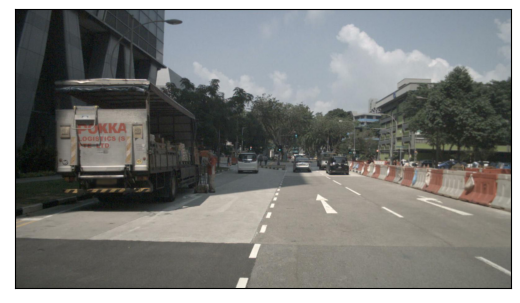

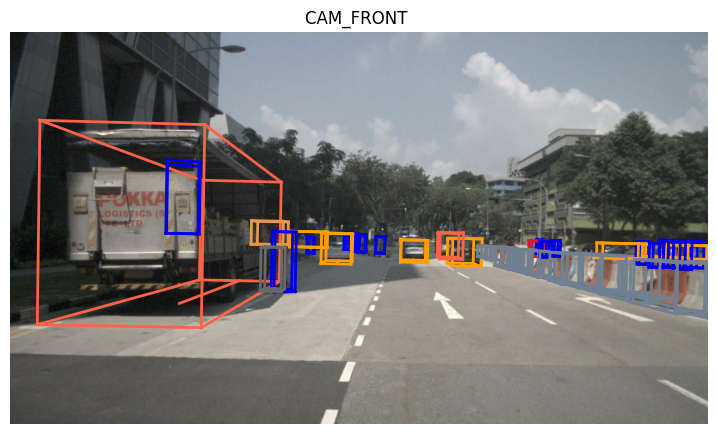

In [6]:
sample_data_1, image_1 = load_nuscenes_image(0)

show(image_1)
nusc.render_sample_data(sample_data_1['token'])

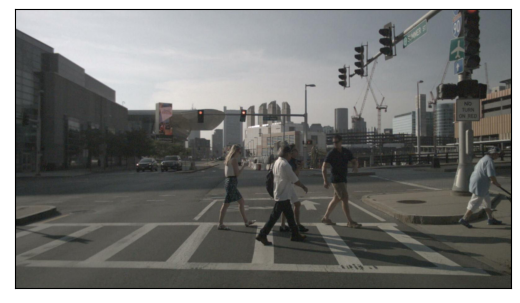

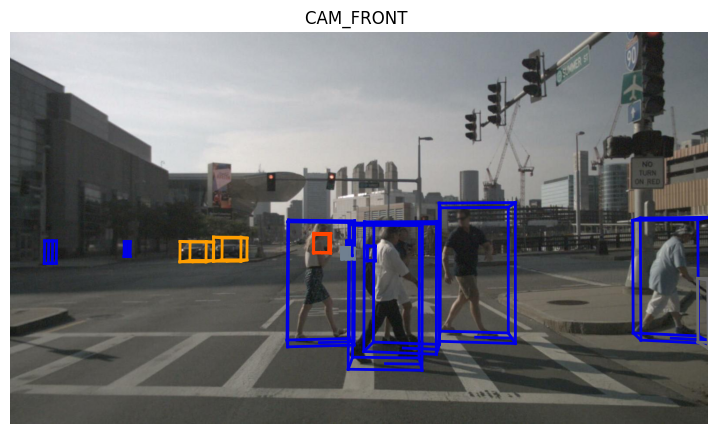

In [7]:
sample_data_2, image_2 = load_nuscenes_image(110)

show(image_2)
nusc.render_sample_data(sample_data_2['token'])

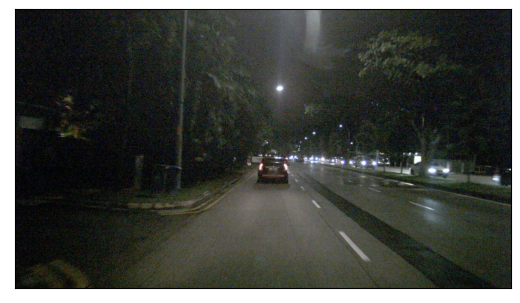

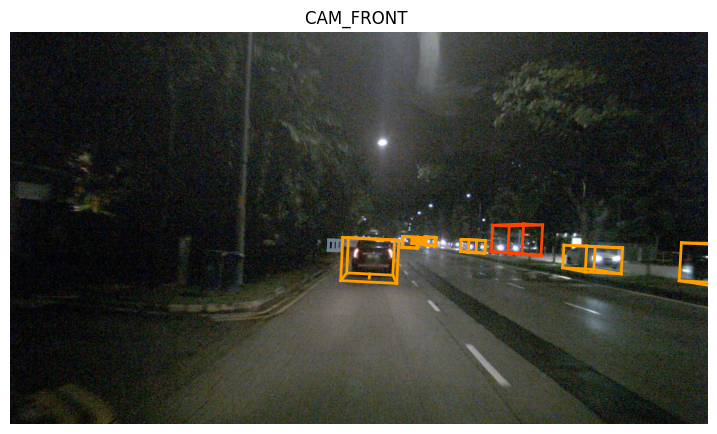

In [8]:
sample_data_3, image_3 = load_nuscenes_image(300)

show(image_3)
nusc.render_sample_data(sample_data_3['token'])

In [9]:
images_list = [image_1, image_2, image_3]

### Chamando o modelo para fazer inferências

In [10]:
weights = FasterRCNN_ResNet50_FPN_Weights.DEFAULT
transforms = weights.transforms()

images = [transforms(img) for img in images_list]

model = fasterrcnn_resnet50_fpn(weights=weights, progress=False)
model = model.eval()

outputs = model(images)

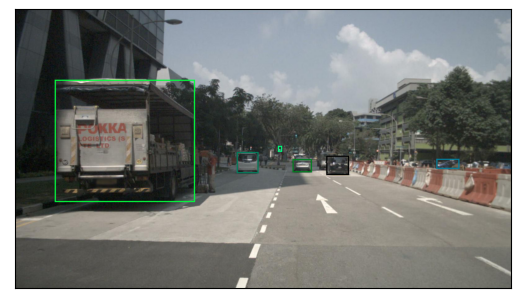

In [13]:
score_threshold = .8
img_1_with_boxes = draw_bounding_boxes(image_1, boxes=outputs[0]['boxes'][outputs[0]['scores'] > score_threshold], width=4)
show(img_1_with_boxes)

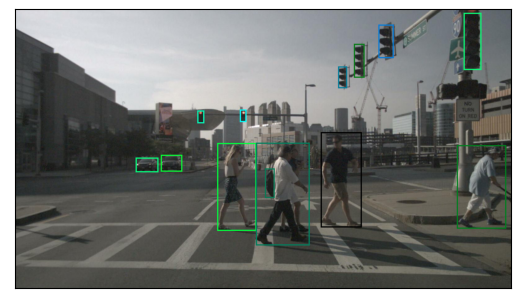

In [14]:
score_threshold = .8
img_2_with_boxes = draw_bounding_boxes(image_2, boxes=outputs[1]['boxes'][outputs[1]['scores'] > score_threshold], width=4)
show(img_2_with_boxes)

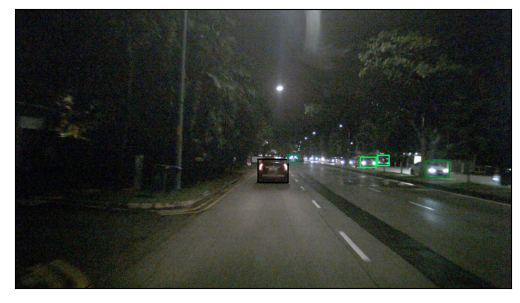

In [15]:
score_threshold = .8
img_3_with_boxes = draw_bounding_boxes(image_3, boxes=outputs[2]['boxes'][outputs[2]['scores'] > score_threshold], width=4)
show(img_3_with_boxes)